In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


#upload the image

image_path = cv2.imread("/content/download.jpg")
image = cv2.cvtColor(image_path , cv2.COLOR_BGR2RGB)

## Add Brightness to the Image

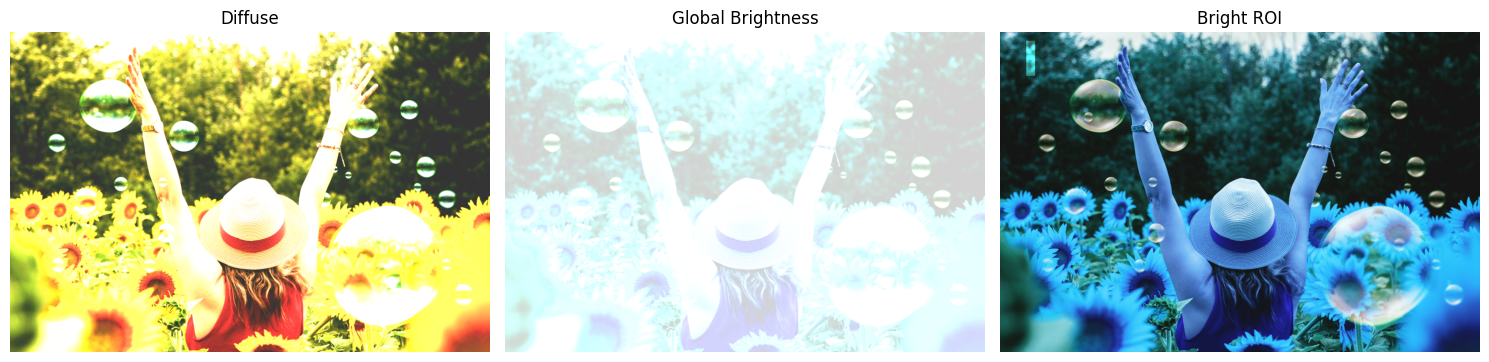

In [5]:
# --- Brightness & Diffusion ---
img4 = image.copy()
diffuse_factor = 0.0098
diffuse_image = np.clip(img4 * diffuse_factor, 0, 1)

img5 = image.copy()
bgf = 3
bright_roi = (100, 500, 300, 400)
img5[bright_roi[0]:bright_roi[1], bright_roi[2]:bright_roi[3]] = cv2.convertScaleAbs(
    img5[bright_roi[0]:bright_roi[1], bright_roi[2]:bright_roi[3]], alpha=bgf
)

img3 = image.copy()
brightness_factor = 190
image_bright = np.clip(img3.astype(np.int16) + brightness_factor, 0, 255).astype(np.uint8)

# --- Plot: Brightness & Diffusion ---
plt.figure(figsize=(15, 5))
brightness_outputs = [
    ("Diffuse", cv2.cvtColor((diffuse_image * 255).astype(np.uint8), cv2.COLOR_BGR2RGB)),
    ("Global Brightness", image_bright),
    ("Bright ROI", img5)
]

for i, (title, img) in enumerate(brightness_outputs):
    plt.subplot(1, 3, i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) if img.ndim == 3 else img)
    plt.title(title)
    plt.axis("off")

plt.tight_layout()
plt.show()

## Geometric Transformations

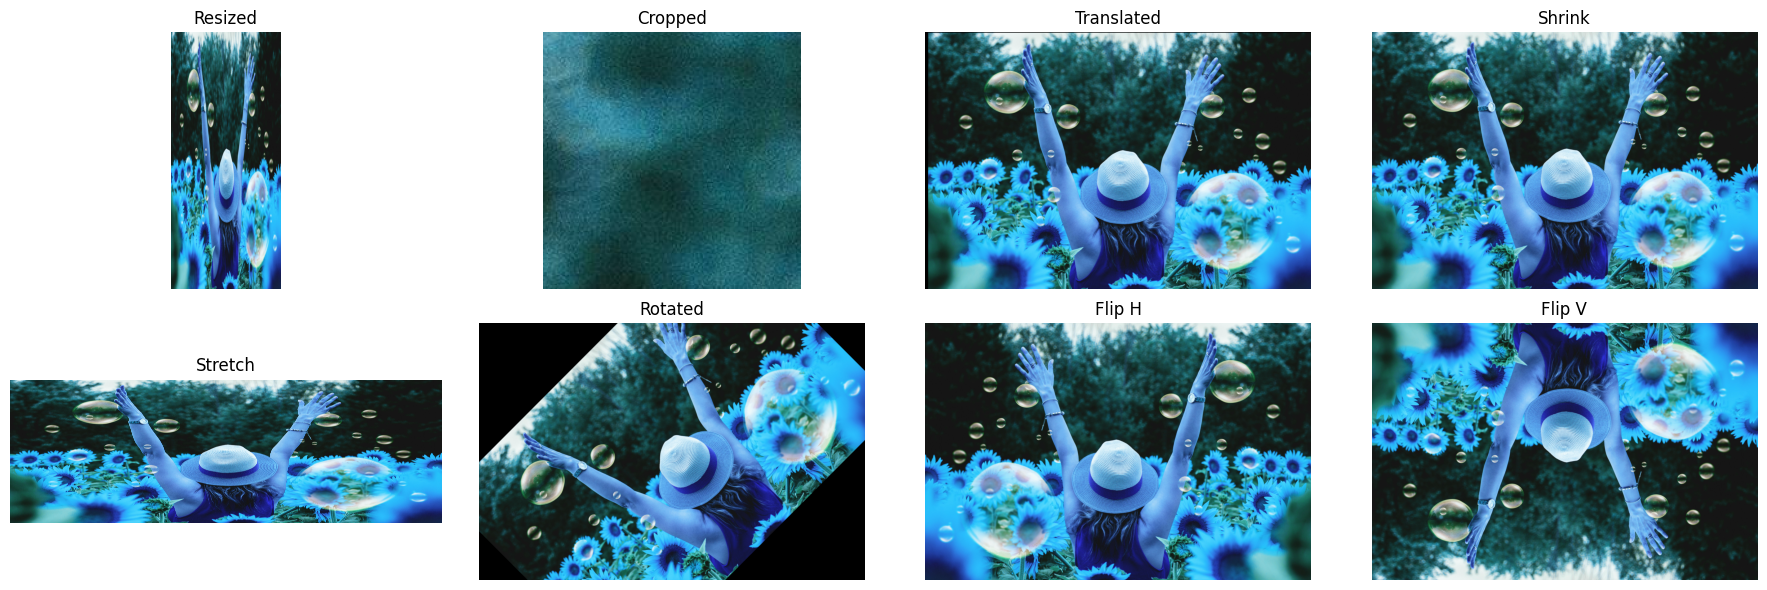

In [6]:
# --- Geometric Transformations ---
image_resize = cv2.resize(image.copy(), (1024, 2404))
image_crop = image.copy()[100:300, 100:300]

img0 = image.copy()
tx, ty = 45, 23
translate_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
translated_image = cv2.warpAffine(img0, translate_matrix, (img0.shape[1], img0.shape[0]))

resize_shrink = cv2.resize(image, (int(image.shape[1] * 0.5), int(image.shape[0] * 0.5)))
resize_stretch = cv2.resize(image, (image.shape[1] * 2, image.shape[0]))

(h, w) = image.shape[:2]
center = (w // 2, h // 2)
rotate_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
rotate_image = cv2.warpAffine(image, rotate_matrix, (w, h))

flip_horizontal = cv2.flip(image, 1)
flip_vertical = cv2.flip(image, 0)

# --- Plot: Geometric Transformations ---
plt.figure(figsize=(18, 6))
geo_outputs = [
    ("Resized", image_resize),
    ("Cropped", image_crop),
    ("Translated", translated_image),
    ("Shrink", resize_shrink),
    ("Stretch", resize_stretch),
    ("Rotated", rotate_image),
    ("Flip H", flip_horizontal),
    ("Flip V", flip_vertical)
]

for i, (title, img) in enumerate(geo_outputs):
    plt.subplot(2, 4, i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")

plt.tight_layout()
plt.show()

# Add Noise to the Image

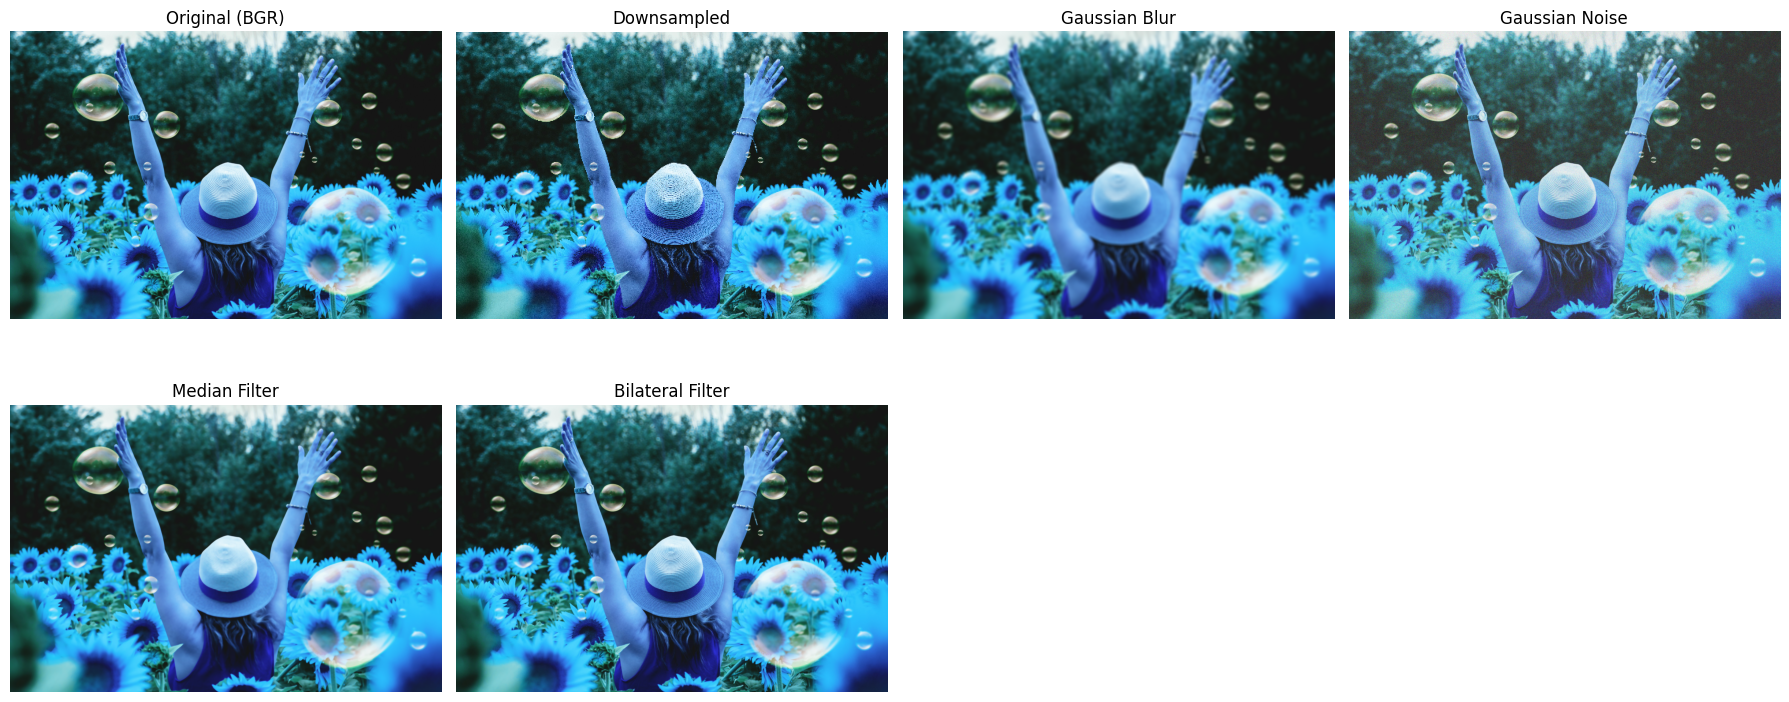

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = cv2.imread("/content/download.jpg")
image = cv2.cvtColor(image_path , cv2.COLOR_BGR2RGB)

# 1. Downsample (skip pixels)
downsample_factor = 10
downsample_image = image[::downsample_factor, ::downsample_factor]

# 2. Gaussian Blur
blur_image = cv2.GaussianBlur(image, (51, 51), 20)

# 3. Add Gaussian Noise
img_float = image.astype(np.float32)
mean = 21
stddev = 64
noise = np.random.normal(mean, stddev, img_float.shape).astype(np.float32)
noisy_image = img_float + noise
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

# 4. Median Filter
median_filter = cv2.medianBlur(image, 23)

# 5. Bilateral Filter
bilateral = cv2.bilateralFilter(image, d=15, sigmaColor=75, sigmaSpace=75)


plt.figure(figsize=(18, 8))

images = [
    ("Original (BGR)", image),
    ("Downsampled", downsample_image),
    ("Gaussian Blur", blur_image),
    ("Gaussian Noise", noisy_image),
    ("Median Filter", median_filter),
    ("Bilateral Filter", bilateral)
]

for i, (title, img) in enumerate(images):
    plt.subplot(2, 4, i + 1)



    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")

plt.tight_layout()
plt.show()

# Add Padding to the Image

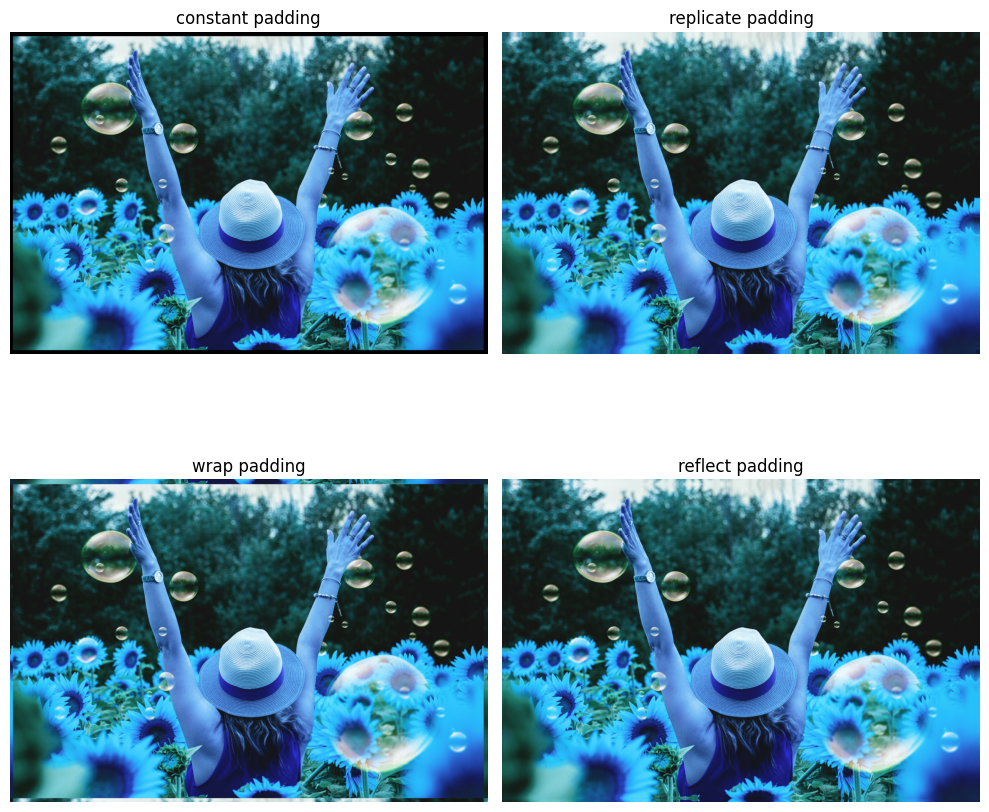

In [8]:
image_16 = image.copy()

padding_modes = [cv2.BORDER_CONSTANT, cv2.BORDER_REPLICATE, cv2.BORDER_WRAP, cv2.BORDER_REFLECT]
padding_names = ["constant", "replicate", "wrap", "reflect"]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, mode in enumerate(padding_modes):
    padded_image = cv2.copyMakeBorder(image_16, 60, 45, 34, 50, mode)
    ax = axes[i // 2, i % 2]
    ax.imshow(cv2.cvtColor(padded_image, cv2.COLOR_BGR2RGB))
    ax.set_title(f"{padding_names[i]} padding")
    ax.axis("off")

plt.tight_layout()
plt.show()

# Zoom In on the Image

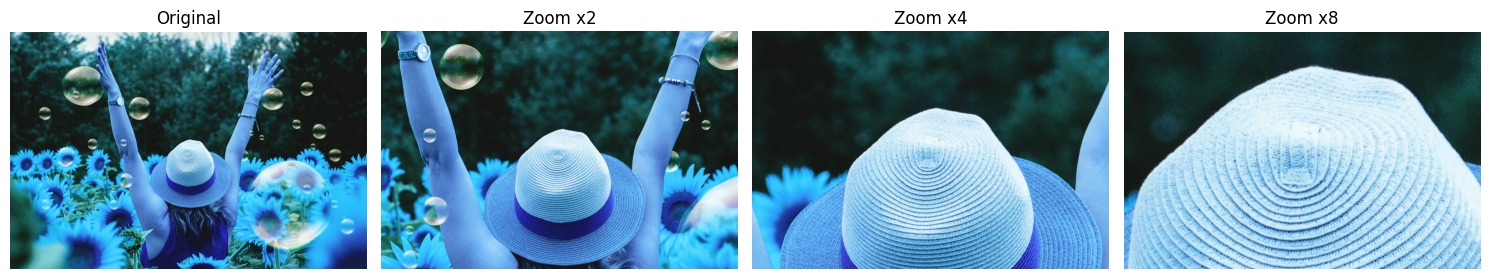

In [9]:
# --- Load and Prepare Image ---
img1 = image.copy()
h, w = img1.shape[:2]

# --- Center Crop Function ---
def crop_center(img, scale):
    """
    Crop the center region of an image by a scale factor.
    For example, scale=2 means cropping to 1/2 size from the center.
    """
    new_h, new_w = h // scale, w // scale
    startx = w // 2 - new_w // 2
    starty = h // 2 - new_h // 2
    return img[starty:starty + new_h, startx:startx + new_w]

# --- Apply Crop and Resize (Zoom Effect) ---
zoom_levels = [1, 2, 4, 8]
zoom_images = []

for z in zoom_levels:
    if z == 1:
        zoom_images.append(("Original", img1))
    else:
        cropped = crop_center(img1, z)
        resized = cv2.resize(cropped, (w, h), interpolation=cv2.INTER_LINEAR)
        zoom_images.append((f"Zoom x{z}", resized))

# --- Plot Zoomed Images ---
plt.figure(figsize=(15, 6))

for i, (title, img) in enumerate(zoom_images):
    plt.subplot(1, len(zoom_images), i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")

plt.tight_layout()
plt.show()

# Add Contours to the Image

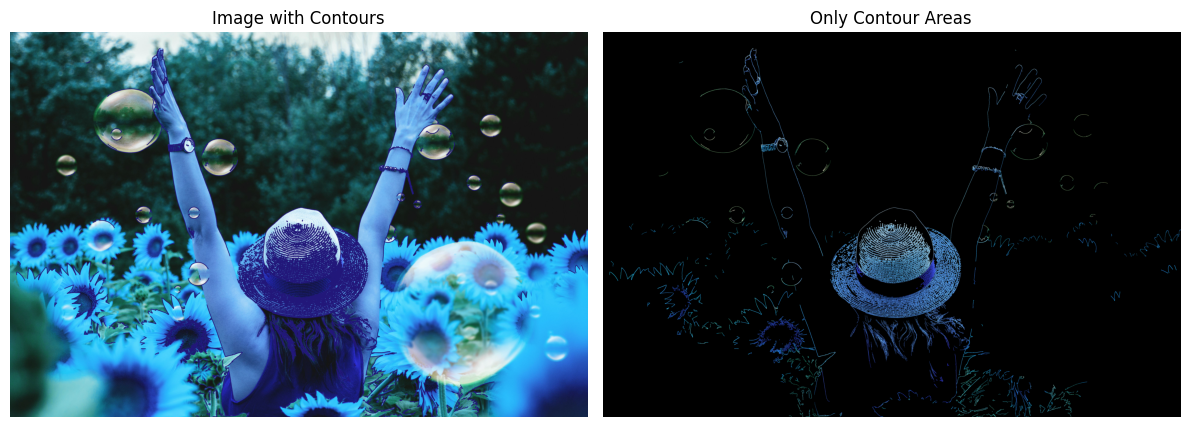

In [10]:
# --- Convert to Grayscale ---
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# --- Apply Gaussian Blur ---
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# --- Canny Edge Detection ---
edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

# --- Find External Contours ---
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# --- Draw All Contours on a Copy of Original ---
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (122, 23, 34), 6)

# --- Create a Binary Mask of Contours ---
mask = np.zeros_like(gray)
cv2.drawContours(mask, contours, -1, color=(255, 255, 255), thickness=2)

# --- Apply Mask to Original Image ---
only_contours = cv2.bitwise_and(image, image, mask=mask)

# --- Convert to RGB for Display ---
contour_image_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)
only_contours_rgb = cv2.cvtColor(only_contours, cv2.COLOR_BGR2RGB)

# --- Plot Contour Results ---
outputs = [
    ("Image with Contours", contour_image_rgb),
    ("Only Contour Areas", only_contours_rgb)
]

plt.figure(figsize=(12, 6))

for i, (title, img) in enumerate(outputs):
    plt.subplot(1, 2, i + 1)
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")

plt.tight_layout()
plt.show()


# Remove the Background from the Image

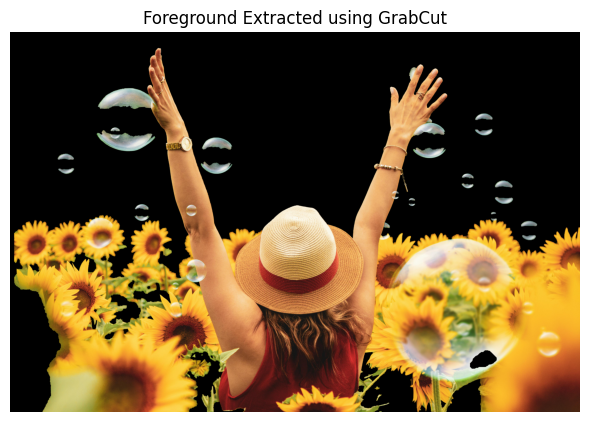

In [11]:
# --- Load and Convert Image to RGB ---
image_path = cv2.imread("/content/download.jpg")
image = cv2.cvtColor(image_path, cv2.COLOR_BGR2RGB)

# --- Initialize GrabCut Parameters ---
mask = np.zeros(image.shape[:2], np.uint8)
bgm_model = np.zeros((1, 65), np.float64)
fgm_model = np.zeros((1, 65), np.float64)

# Rectangle defining the foreground region (x, y, width, height)
rect = (40, 40, image.shape[1] - 40, image.shape[0] - 40)

# --- Apply GrabCut Segmentation ---
cv2.grabCut(image, mask, rect, bgm_model, fgm_model, 5, cv2.GC_INIT_WITH_RECT)

# --- Create Binary Mask: 1 for foreground, 0 for background ---
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype("uint8")

# --- Apply Mask to Extract Foreground ---
result = image * mask2[:, :, np.newaxis]

# --- Plot the Extracted Foreground ---
plt.figure(figsize=(6, 6))
plt.imshow(result)
plt.title("Foreground Extracted using GrabCut")
plt.axis("off")
plt.tight_layout()
plt.show()

# Perform Edge Detection on the Image

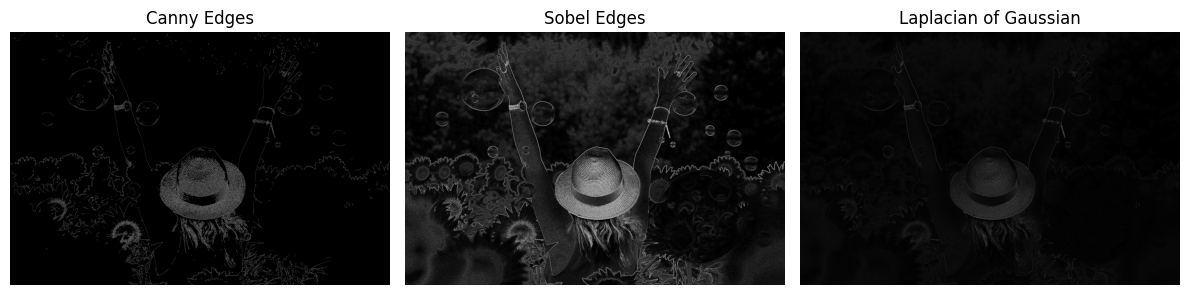

In [12]:
# --- Load Image in Grayscale ---
img = cv2.imread("/content/download.jpg", cv2.IMREAD_GRAYSCALE)

# --- Canny Edge Detection ---
img_blur = cv2.GaussianBlur(img.copy(), (5, 5), 1)
canny_edges = cv2.Canny(img_blur, threshold1=50, threshold2=100)

# --- Sobel Edge Detection ---
sobelx = cv2.Sobel(img, cv2.CV_64F, dx=1, dy=0, ksize=3)  # Horizontal gradient
sobely = cv2.Sobel(img, cv2.CV_64F, dx=0, dy=1, ksize=3)  # Vertical gradient
sobel_magnitude = cv2.magnitude(sobelx, sobely)
sobel_edges = cv2.convertScaleAbs(sobel_magnitude)

# --- Laplacian of Gaussian (LoG) ---
blurred_img = cv2.GaussianBlur(img.copy(), (5, 5), sigmaX=1)
laplacian = cv2.Laplacian(blurred_img, cv2.CV_64F)
laplacian_edges = cv2.convertScaleAbs(laplacian)

# --- Plot Results ---
titles_images = [
    ("Canny Edges", canny_edges),
    ("Sobel Edges", sobel_edges),
    ("Laplacian of Gaussian", laplacian_edges)
]

plt.figure(figsize=(12, 6))
for i, (title, edge_img) in enumerate(titles_images):
    plt.subplot(1, 3, i + 1)
    plt.imshow(edge_img, cmap='gray')
    plt.title(title)
    plt.axis("off")

plt.tight_layout()
plt.show()

# Apply Style Transfer to the Image

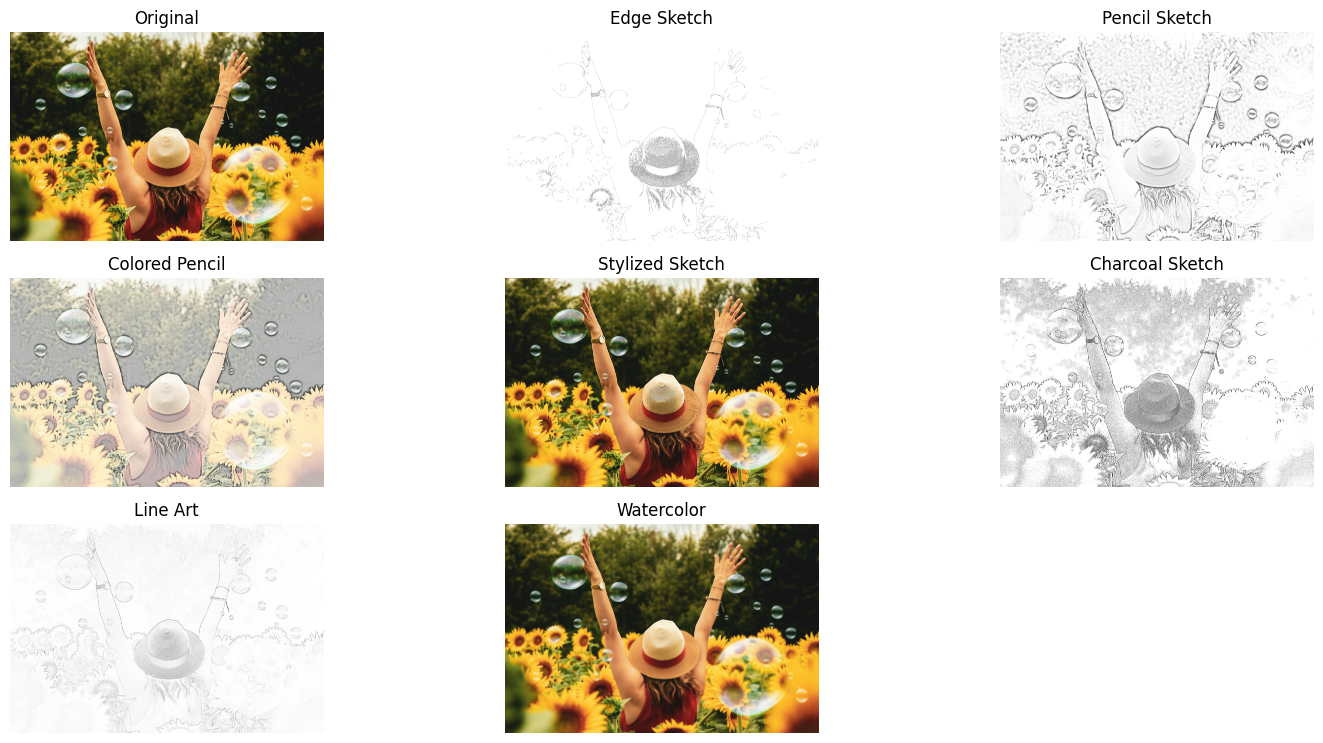

In [13]:

# --- Method 1: Basic Edge Detection Sketch ---
def edge_sketch(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blur, 50, 150)
    return cv2.bitwise_not(edges)

# --- Method 2: Pencil Sketch using Dodge Blend ---
def pencil_sketch(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    inverted = cv2.bitwise_not(gray)
    blurred = cv2.GaussianBlur(inverted, (111, 111), 0)
    return cv2.divide(gray, 255 - blurred, scale=256)

# --- Method 3: Colored Pencil Sketch ---
def colored_pencil_sketch(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    inverted = cv2.bitwise_not(gray)
    blurred = cv2.GaussianBlur(inverted, (111, 111), 0)
    pencil_gray = cv2.divide(gray, 255 - blurred, scale=256)
    pencil_color = cv2.cvtColor(pencil_gray, cv2.COLOR_GRAY2BGR)
    return cv2.addWeighted(img, 0.3, pencil_color, 0.7, 0)

# --- Method 4: Stylized Sketch using Bilateral Filter ---
def stylized_sketch(img):
    bilateral = cv2.bilateralFilter(img, 9, 200, 200)
    gray = cv2.cvtColor(bilateral, cv2.COLOR_BGR2GRAY)
    blur = cv2.medianBlur(gray, 5)
    edges = cv2.adaptiveThreshold(
        blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9
    )
    edges_colored = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
    return cv2.bitwise_and(bilateral, edges_colored)

# --- Method 5: Charcoal Sketch Effect ---
def charcoal_sketch(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Laplacian(blur, cv2.CV_8U, ksize=5)
    _, thresh = cv2.threshold(edges, 70, 255, cv2.THRESH_BINARY_INV)
    kernel = np.ones((2, 2), np.uint8)
    return cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# --- Method 6: Detailed Line Art ---
def line_art(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    sobelx = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(sobelx**2 + sobely**2)
    normalized = np.uint8((magnitude / magnitude.max()) * 255)
    return cv2.bitwise_not(normalized)

# --- Method 7: Watercolor Effect ---
def watercolor_sketch(img):
    h, w = img.shape[:2]
    small = cv2.resize(img, (w//2, h//2))
    for _ in range(3):
        small = cv2.bilateralFilter(small, 9, 200, 200)
    large = cv2.resize(small, (w, h))
    gray = cv2.cvtColor(large, cv2.COLOR_BGR2GRAY)
    edges = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 23, 23
    )
    edges_bgr = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
    return cv2.bitwise_and(large, edges_bgr)

# --- Main: Load, apply all methods, and display ---
if __name__ == "__main__":
    img_path = "/content/download.jpg"
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    methods = {
        "Edge Sketch": edge_sketch,
        "Pencil Sketch": pencil_sketch,
        "Colored Pencil": colored_pencil_sketch,
        "Stylized Sketch": stylized_sketch,
        "Charcoal Sketch": charcoal_sketch,
        "Line Art": line_art,
        "Watercolor": watercolor_sketch,
    }

    results = {name: func(cv2.cvtColor(img, cv2.COLOR_RGB2BGR)) for name, func in methods.items()}

    plt.figure(figsize=(15, 10))
    cols = 3
    rows = (len(results) + cols - 1) // cols + 1

    # Show original
    plt.subplot(rows, cols, 1)
    plt.imshow(img)
    plt.title("Original")
    plt.axis("off")

    # Show each sketch
    for i, (name, res) in enumerate(results.items(), start=2):
        plt.subplot(rows, cols, i)
        if res.ndim == 2:
            plt.imshow(res, cmap="gray")
        else:
            plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
        plt.title(name)
        plt.axis("off")

    plt.tight_layout()
    plt.show()